# Лабораторна робота №1

### Попередня обробка зображень

Варіант - 4

Виконати медіанну фільтрацію зображення з різними значеннями ядра. Провести  порівняльний аналіз



In [22]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [23]:
# Завантажуємо зображення
img_files = ['././images/high_detail.jpg', '././images/low_detailed.jpg', '././images/low_contrast.jpg', '././images/high_contrast.jpg']
images = [np.array(Image.open(file)) for file in img_files]

# Конвертація в чорно-біле зображення
gray_images = [np.dot(img_arr[...,:3], [0.2989, 0.5870, 0.1140]) for img_arr in images]

# Задання розміру ядра
kernel_sizes = [3, 5, 7]

In [24]:
# Функція для виконання медіанної фільтрації зображення
def median_filter(img, kernel_size):
    filtered_img = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # Визначення області під ядром
            kernel = img[max(0, i-kernel_size//2):min(img.shape[0]-1, i+kernel_size//2),
                         max(0, j-kernel_size//2):min(img.shape[1]-1, j+kernel_size//2)]
            # Знаходження медіани відповідної області
            filtered_img[i, j] = np.median(kernel)
    return filtered_img

In [25]:
# Виконання медіанної фільтрації зображення з різними значеннями ядра

filtered_images = []
for gray_img in gray_images:
    filtered_images.append([median_filter(gray_img, kernel_size) for kernel_size in kernel_sizes])

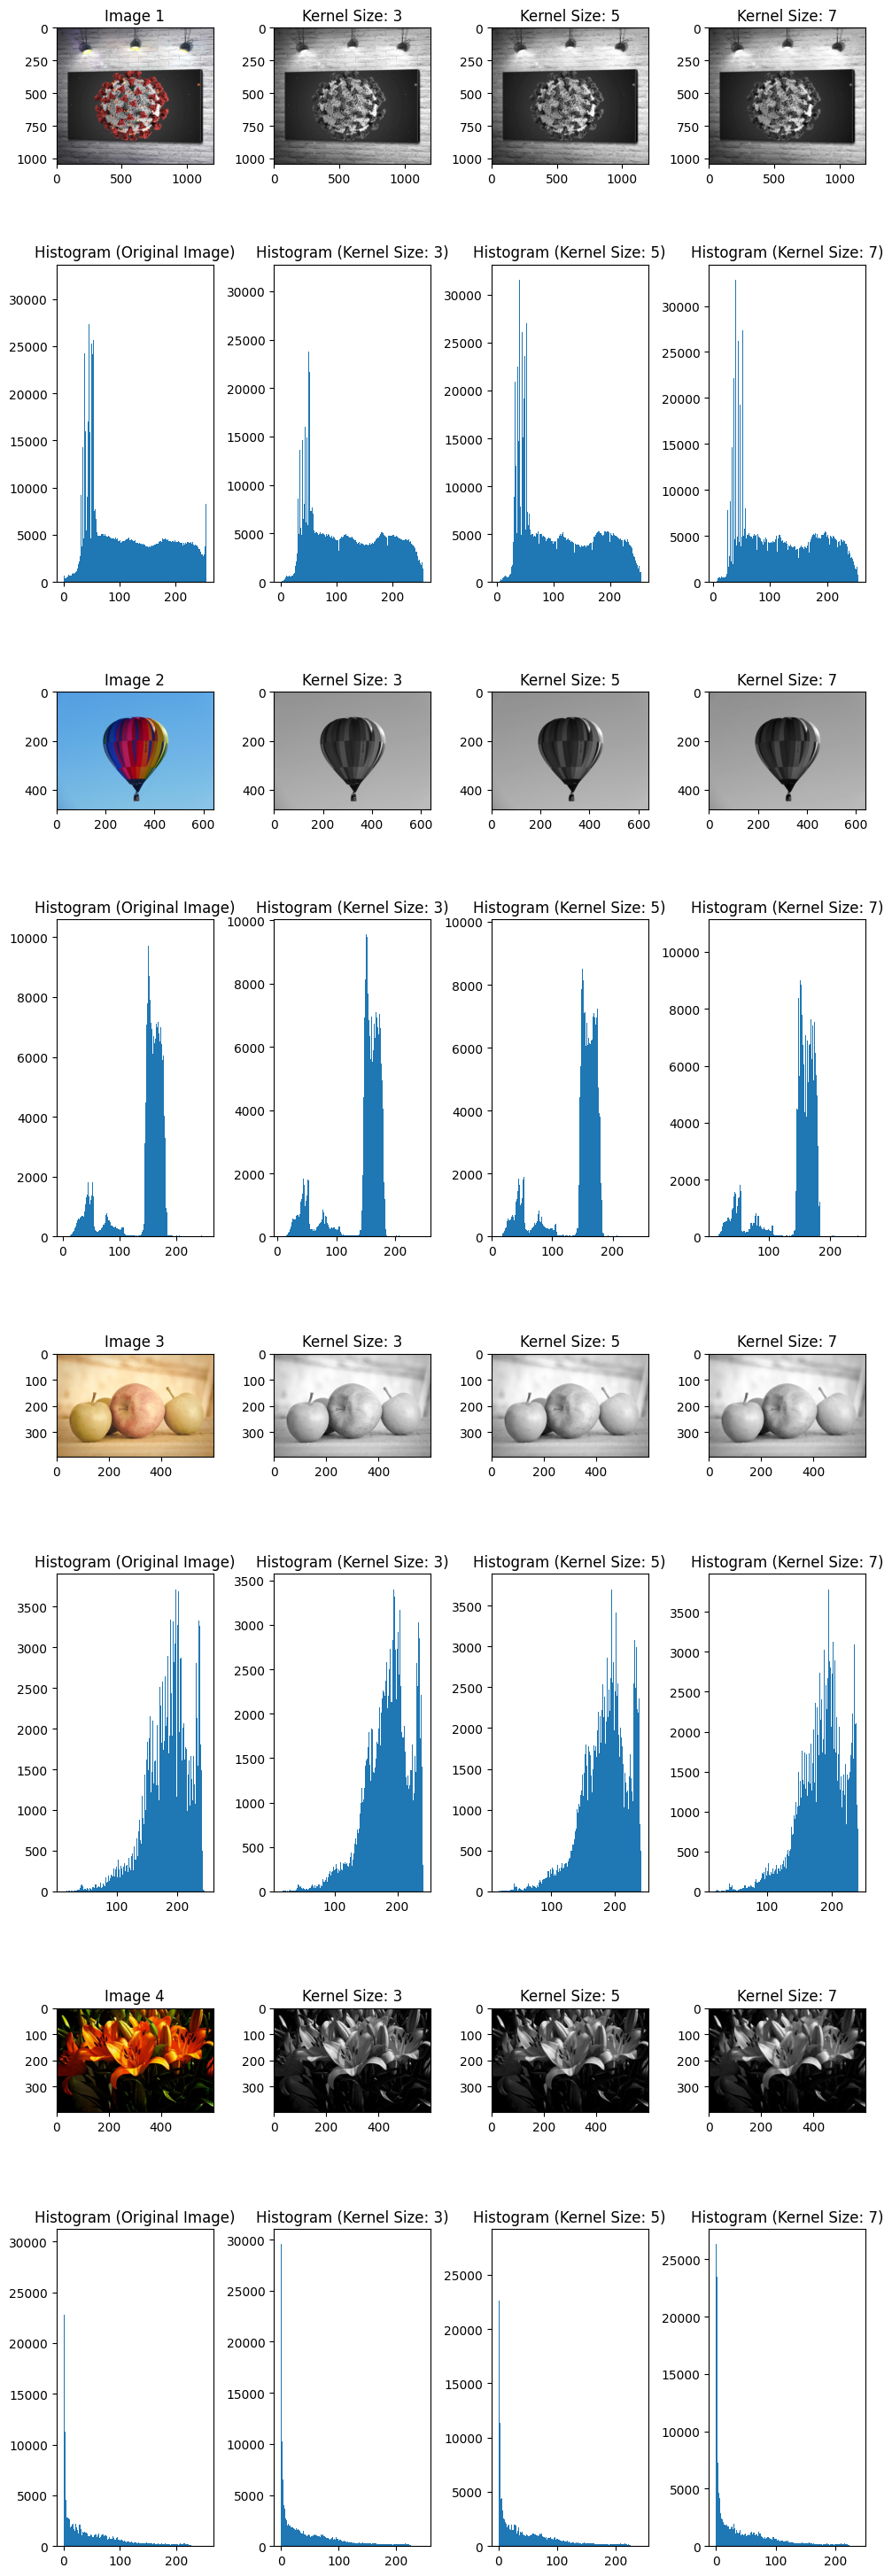

In [31]:
# Відображення результатів
fig, axes = plt.subplots(nrows=len(images)*2, ncols=4, figsize=(10, 30))

row_idx = 0
for i, (img_arr, gray_img, filtered_imgs) in enumerate(zip(images, gray_images, filtered_images)):
    # Відображення початкового зображення
    axes[row_idx][0].imshow(img_arr)
    axes[row_idx][0].set_title('Image {}'.format(i+1))

    # Відображення гістограм початкового зображення
    hist_bins = 256
    axes[row_idx+1][0].hist(gray_img.ravel(), hist_bins)
    axes[row_idx+1][0].set_title('Histogram (Original Image)')

    # Відображення відфільтрованих зображень
    for j, filtered_img in enumerate(filtered_imgs):
        axes[row_idx][j+1].imshow(filtered_img, cmap='gray')
        axes[row_idx][j+1].set_title('Kernel Size: {}'.format(kernel_sizes[j]))

     # Відображення гістограм відфільтрованих зображень
        axes[row_idx+1][j+1].hist(filtered_img.ravel(), hist_bins)
        axes[row_idx+1][j+1].set_title('Histogram (Kernel Size: {})'.format(kernel_sizes[j]))

    row_idx += 2
plt.tight_layout()
plt.show()